World Happiness Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/santi/Downloads/BaseTdecisiones_IyAD (1).csv", encoding='latin-1')
df

,Países,nivel socioeconómico,Nivel de generosidad,VD (libertad para tomar decisiones)
0,Alemania,4,2,0.846
1,Arabia Saudíta,4,1,0.894
2,Australia,4,2,0.890
3,Austria,4,2,0.855
4,Bahrein,4,2,0.944
...,...,...,...,...
130,Mozambique,2,2,0.851
131,Sierra Leona,2,2,0.660
132,Togo,2,2,0.657
133,Uganda,2,2,0.701


In [3]:
## Boxplot por nivel socioeconómico
# 4 boxplots mostrando el puntaje de capacidad para tomar decisiones de cada grupo

## Boxplot por nivel de generosidad 
## Si se encuentra una interacción entre las variables gráficar boxplot de ese grupo vs los demás
## 3 países con mayor capacidad para tomar decisiones vs 5 con menos 
df.dtypes

Países                                  object
nivel socioeconómico                     int64
Nivel de generosidad                     int64
VD (libertad para tomar decisiones)    float64
dtype: object

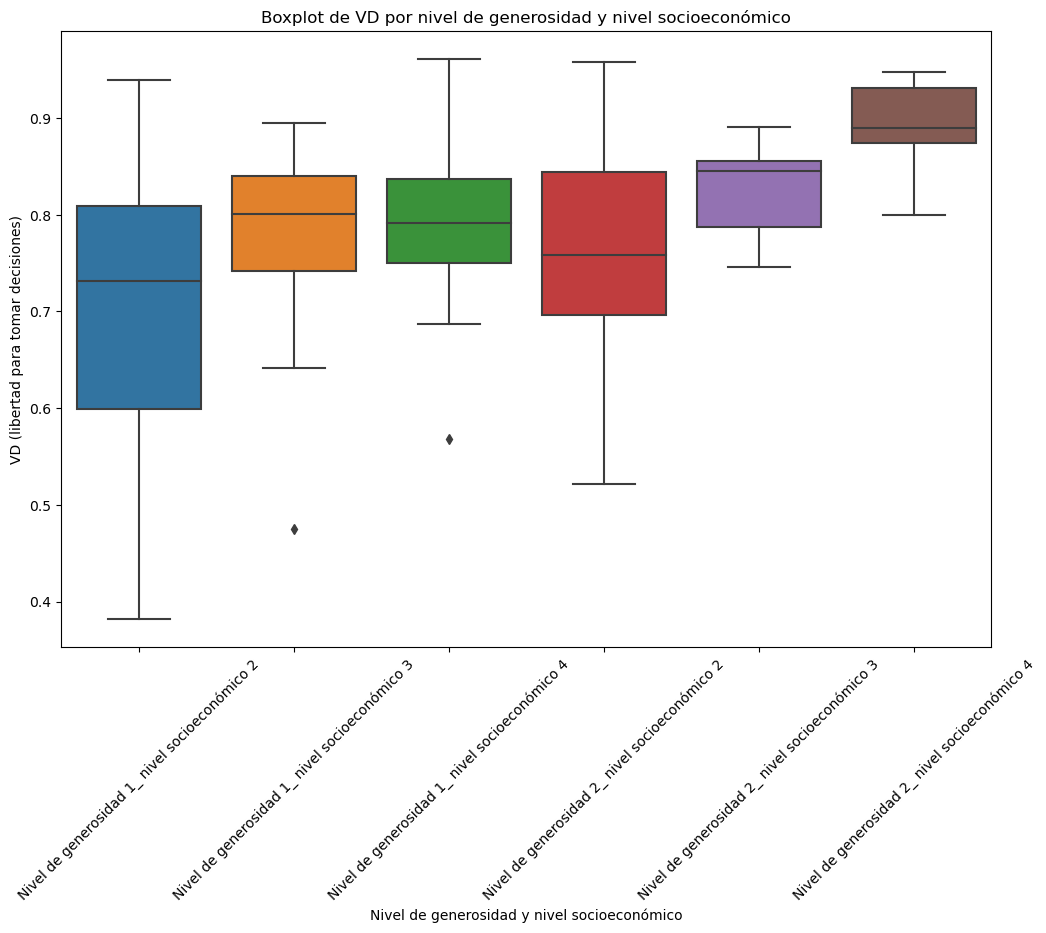

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu dataframe se llama df

# Primero, crear una nueva variable en el dataframe que combina los niveles de generosidad y socioeconómico
df['Generosidad_Socioeconomia'] = 'Nivel de generosidad ' + df['Nivel de generosidad'].astype(str) + '_ nivel socioeconómico ' + df['nivel socioeconómico'].astype(str)

# Ordenar los niveles del factor combinado para que se muestren en el orden deseado en el gráfico
levels_order = sorted(df['Generosidad_Socioeconomia'].unique())

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Generosidad_Socioeconomia', y='VD (libertad para tomar decisiones)', data=df, order=levels_order)
plt.title('Boxplot de VD por nivel de generosidad y nivel socioeconómico')
plt.xlabel('Nivel de generosidad y nivel socioeconómico')
plt.ylabel('VD (libertad para tomar decisiones)')
plt.xticks(rotation=45)
plt.show()


In [5]:
df

,Países,nivel socioeconómico,Nivel de generosidad,VD (libertad para tomar decisiones),Generosidad_Socioeconomia
0,Alemania,4,2,0.846,2_4
1,Arabia Saudíta,4,1,0.894,1_4
2,Australia,4,2,0.890,2_4
3,Austria,4,2,0.855,2_4
4,Bahrein,4,2,0.944,2_4
...,...,...,...,...,...
130,Mozambique,2,2,0.851,2_2
131,Sierra Leona,2,2,0.660,2_2
132,Togo,2,2,0.657,2_2
133,Uganda,2,2,0.701,2_2


<Axes: xlabel='nivel socioeconómico', ylabel='VD (libertad para tomar decisiones)'>

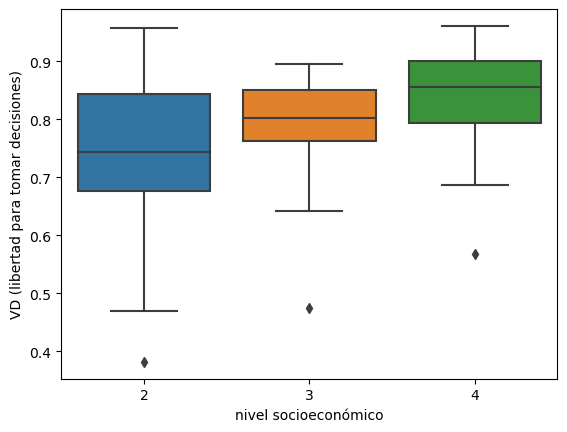

In [6]:
## Boxplot por nivel socioeconómico
sns.boxplot(x='nivel socioeconómico', y= 'VD (libertad para tomar decisiones)', data=df)


<Axes: xlabel='Nivel de generosidad', ylabel='VD (libertad para tomar decisiones)'>

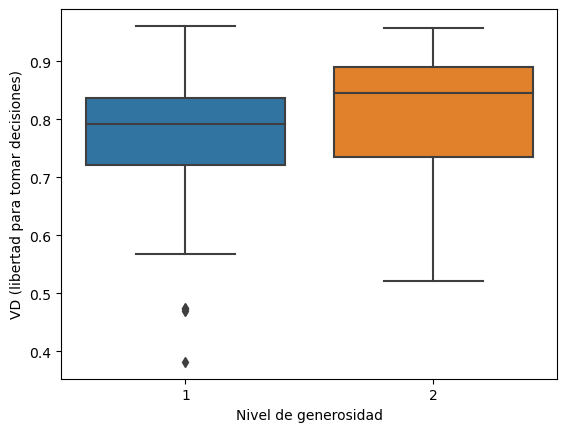

In [7]:
## Boxplot por nivel socioeconómico
sns.boxplot(x='Nivel de generosidad', y= 'VD (libertad para tomar decisiones)', data=df)

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo GeoJSON o Shapefile con las geometrías de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Asegurarse de que los nombres de los países en ambos DataFrames están en el mismo formato
# Esto podría requerir algún preprocesamiento dependiendo de tus datos
df['Country name'] = df['Country name'].str.title()

# Combinar el DataFrame de generosidad con el GeoDataFrame del mundo
world = world.merge(df, left_on='name', right_on='Country name', how='left')

# Rellenar los valores nulos de generosidad con 0
world['Freedom to make life choices'] = world['Freedom to make life choices']

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Freedom to make life choices', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Libertad para tomar decisiones')
plt.show()


C:\Users\santi\AppData\Local\Temp\ipykernel_19208\1595599305.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


KeyError: 'Country name'

In [ ]:
# Correlaciones entre nivel de generosidad y libertad para tomar decisiones entre cada grupo de países por nivel socioeconómico
dfbajo = pd.read_csv("C:/Users/santi/Downloads/CorrelaciónINBmediobajoybajo - CorrelaciónINBmediobajoybajo.csv", encoding='latin-1')
dfmedioalto = pd.read_csv("C:/Users/santi/Downloads/CorrelaciónINBmedioalto.csv",  encoding='latin-1')
dfalto = pd.read_csv("C:/Users/santi/Downloads/alto.csv", encoding='latin-1')

correlation_bajo = dfbajo['Nivel de generosidad'].corr(dfbajo['VD (libertad para tomar decisiones)'])
correlation_medioalto = dfmedioalto['Nivel de generosidad'].corr(dfmedioalto['VD (libertad para tomar decisiones)'])
correlation_alto = dfalto['Nivel de generosidad'].corr(dfalto['VD (libertad para tomar decisiones)'])
print("Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico bajo y medio bajo:", correlation_bajo)
print("Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico medio alto:", correlation_medioalto)
print("Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico alto:", correlation_alto)


Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico bajo y medio bajo: 0.2034766050549761
Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico medio alto: 0.029771668579202076
Correlación entre nivel de generosidad y libertad para tomar decisiones en los países de nivel socioeconómico alto: 0.6247668607898934
